In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.optimizers import Adam
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.datasets import cifar10
from keras import backend as K

Using TensorFlow backend.


In [2]:
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

In [3]:
X_train.shape

(50000, 32, 32, 3)

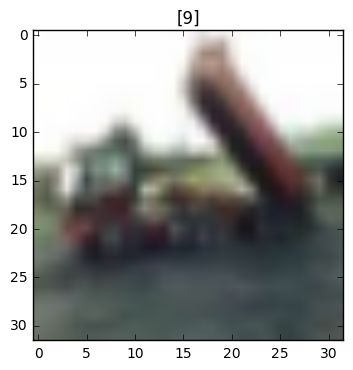

In [4]:
plt.imshow(X_train[2])
plt.title(Y_train[2])

In [5]:
# X_train = X_train.reshape(X_train.shape[0], 3, 32, 32)
# X_test = X_test.reshape(X_test.shape[0], 3, 32, 32)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train = X_train/255
X_test = X_test/255

X_train.shape

(50000, 32, 32, 3)

In [6]:
num_classes = 10

Y_train = np_utils.to_categorical(Y_train, num_classes)
Y_test = np_utils.to_categorical(Y_test, num_classes)

In [7]:
Y_train[0]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.])

In [8]:
# model = Sequential([
#         Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32,32,3)),
#         Conv2D(32, (3, 3), activation='relu', padding='same'),
#         MaxPooling2D(),
        
#         Flatten(),
#         Dense(256, activation='relu'),
#         Dropout(0.5),
#         Dense(10, activation='softmax'),
#     ])

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(32,32,3))) 
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))

In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 7200)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               921728    
_________________________________________________________________
activation_2 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
__________

In [10]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(1e-4), metrics=['accuracy'])

In [11]:
# train_gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
#                                height_shift_range=0.08, zoom_range=0.08)

# test_gen = ImageDataGenerator()

In [12]:
# train_generator = train_gen.flow(X_train, Y_train, batch_size=64)
# test_generator = test_gen.flow(X_test, Y_test, batch_size=64)

Cannot get a better accuracy than this, since I am running this model on a CPU.

1. But the accuracy can be increased by using a Deeper Network
2. We can also use a pretrained model on Imagenet(VGG, Resnet) and finetune it.

In [24]:
# model.fit_generator(train_generator, epochs=2, steps_per_epoch=60000//64, 
#                     validation_data=test_generator, validation_steps=10000//64)

model.fit(X_train, Y_train, batch_size=64, epochs=4, validation_data=(X_test, Y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/4
50000/50000 [==============================] - 86s - loss: 1.5642 - acc: 0.4483 - val_loss: 1.4618 - val_acc: 0.4901
Epoch 2/4
50000/50000 [==============================] - 77s - loss: 1.4475 - acc: 0.4893 - val_loss: 1.3671 - val_acc: 0.5251
Epoch 3/4
50000/50000 [==============================] - 79s - loss: 1.3751 - acc: 0.5150 - val_loss: 1.3164 - val_acc: 0.5450
Epoch 4/4
50000/50000 [==============================] - 76s - loss: 1.3170 - acc: 0.5375 - val_loss: 1.2711 - val_acc: 0.5575


In [25]:
model.save_weights('cnn_32x1_no_data_aug_epoch_5_visualize.h5')

In [11]:
model.load_weights('cnn_32x1_no_data_aug_epoch_5_visualize.h5')

In [13]:
model.evaluate(X_test, Y_test, batch_size=64)

10000/10000 [==============================] - 5s     


[1.2710621957778931, 0.5575]

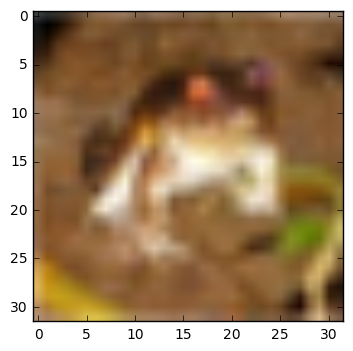

In [26]:
img_to_visualize = X_train[0]
plt.imshow(img_to_visualize)

img_to_visualize = np.expand_dims(img_to_visualize, axis=0)

In [27]:
def layer_to_visualize(layer):
#     inputs = [K.learning_phase()] + model.inputs

#     _convout1_f = K.function([[model.layers[0].input, K.learning_phase()]], [layer.output])
    _convout1_f = K.function([model.layers[0].input, K.learning_phase()], [layer.output])
    
    def convout1_f(X):
        # The [0] is to disable the training phase flag
        return _convout1_f([X, 0])

    convolutions = convout1_f(img_to_visualize)
    convolutions = np.squeeze(convolutions)
   
    print ('Shape of conv:', convolutions.shape)

#     Visualization of each filter of the layer
    fig = plt.figure(figsize=(12,8))
    for i in range(len(convolutions)):
        ax = fig.add_subplot(6,6,i+1)
        ax.imshow(convolutions[:,:,i], cmap='gray')




('Shape of conv:', (30, 30, 32))


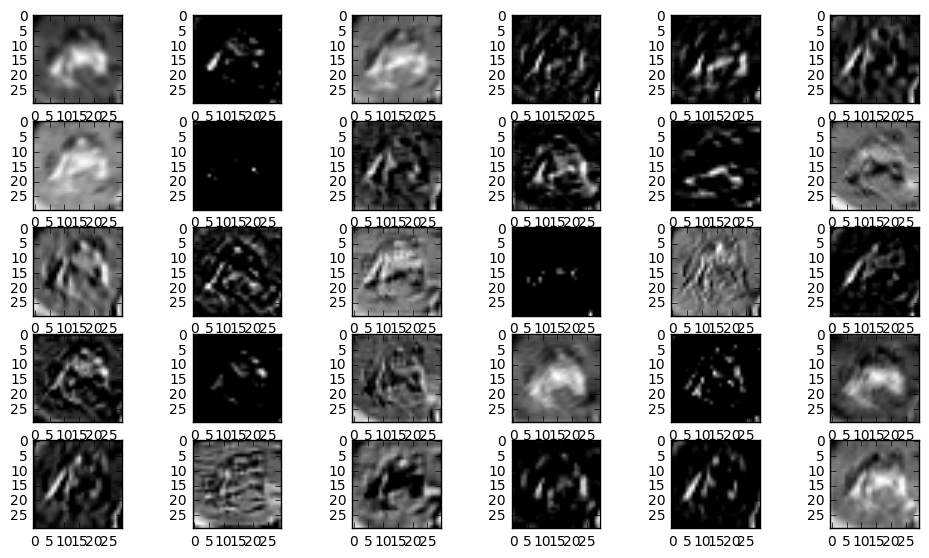

In [28]:
layer_to_visualize(model.layers[-8])